# Challenge 3

In [1]:
# import libraries here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Import the titanic file. Name your dataset `titanic`.

In [4]:
titanic = pd.read_csv('./titanic.csv',low_memory=False)
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes

In [6]:
#your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?

*Hint: Use Pandas `select_dtypes`*

In [7]:
# your code here- numerical variable
titanic.select_dtypes(exclude=object).head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250


In [188]:
#your code here- categorical variable
titanic.select_dtypes(exclude=['int','float']).head(3)

,PassengerId,Pclass,Name,Gender,SibSp,Parch,Ticket,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,U0,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,U0,S


In [189]:
titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,1309.0,655.000000,378.020061,1.00,328.0000,655.0000,982.000,1309.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.000,1.0000
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.0000,3.000,3.0000
Age,1309.0,29.879186,13.448335,0.17,22.0000,28.5000,37.000,80.0000
SibSp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000
Fare,1309.0,33.281086,51.741500,0.00,7.8958,14.4542,31.275,512.3292


#### Set the plot style to `classic` and the figure size to `(12,6)`

*Hint: To set the style you can use `matplotlib.pyplot` functions or seaborn*

In [10]:
# your code here
plt.style.use('classic')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

#### Use the appropriate visulalization to show the distribution of the column `Age`

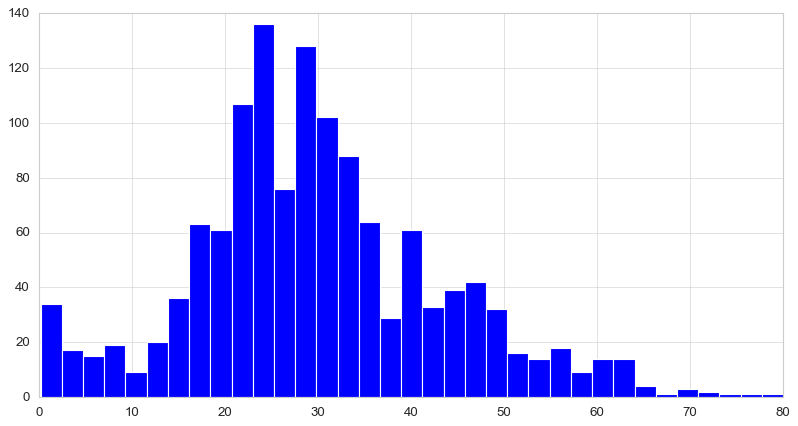

In [18]:
# your code here
titanic['Age'].hist(bins=35)

#### Use subplots to plot the distribution of the `Age` variable with bins equal to `10`, `20` and `50`.

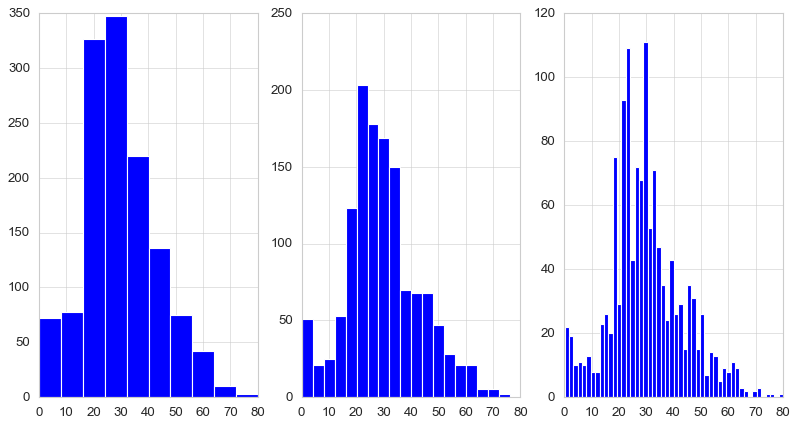

In [21]:
# your code here
plt.subplot(1,3,1)
titanic['Age'].hist(bins=10)
plt.subplot(1,3,2)
titanic['Age'].hist(bins=20)
plt.subplot(1,3,3)
titanic['Age'].hist(bins=50)

#### Whether the bin size affects your plot? Why?

In [2]:
#your comment here
# The bin size help to get a more detailed information about the ages of the passenger, while les bins we get more an
# overall view of the ages, however more precise on the 80 bins graph, where you can notice that there were more babies
# between 0 and 3 years than kids between 4 and 14 years

#### Use seaborn to show the distribution of the column `Age`

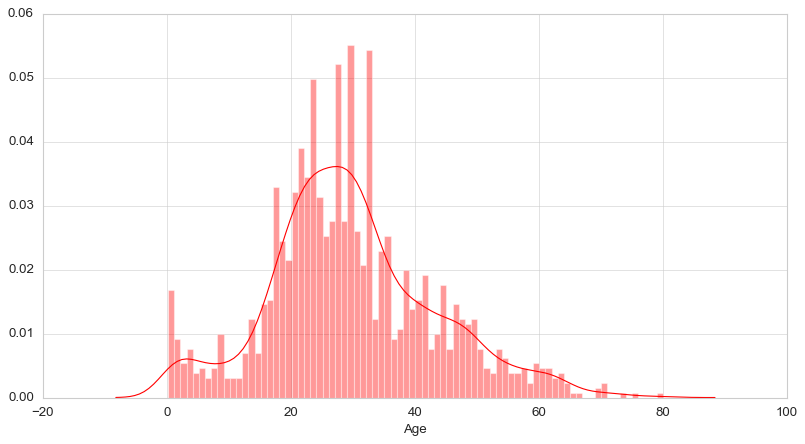

In [52]:
# your code here
sns.distplot(titanic['Age'],bins=80,kde=True,color='red');

#### Use the appropriate plot to visualize the column `Gender`. There are 2 ways of doing it. Do it both ways.

*Hint: Use matplotlib and seaborn*

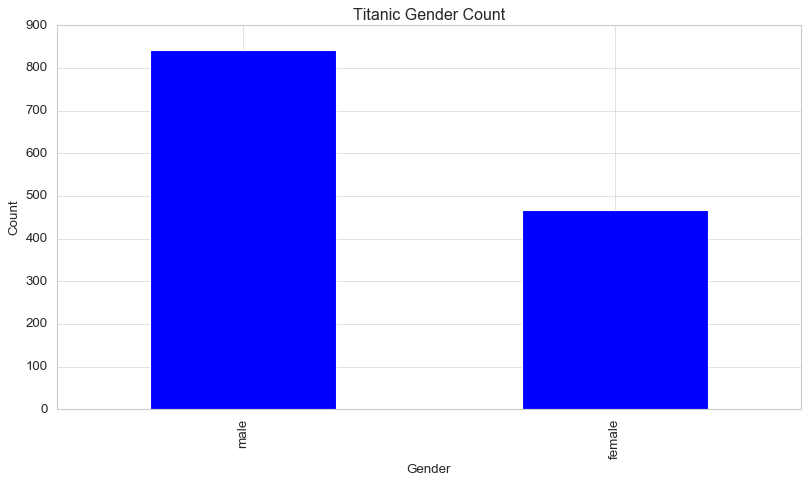

In [38]:
# your code here- 1st way
# This plot helps us to count number of people per gender

titanic['Gender'].value_counts().plot(kind='bar')
plt.title('Titanic Gender Count')
plt.xlabel('Gender')
plt.ylabel('Count');

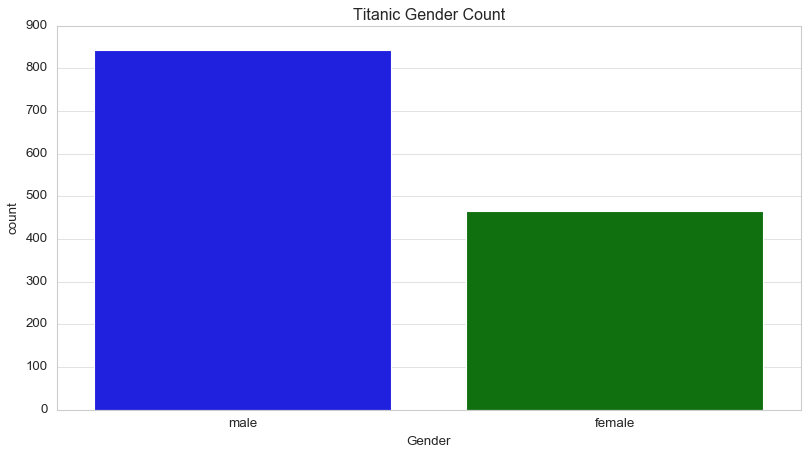

In [43]:
# your code here- 2nd way
# This plot helps us to count number of people per gender
sns.countplot(x='Gender',data=titanic)
plt.title('Titanic Gender Count');

#### Use the appropriate plot to visualize the column `Pclass` 


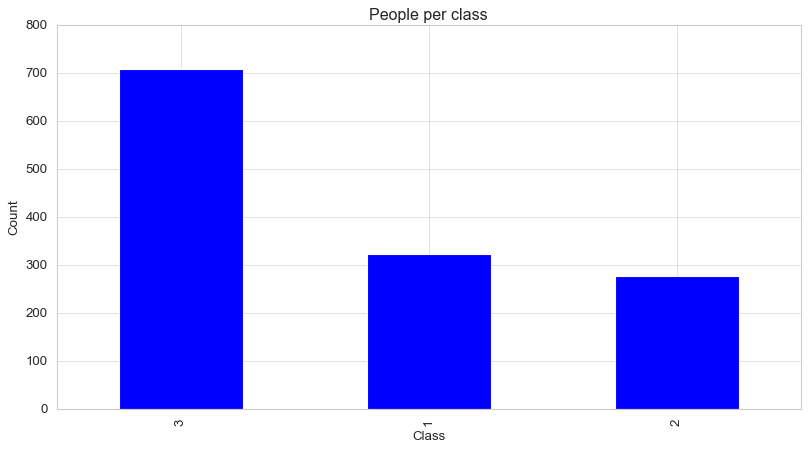

In [49]:
# your code here
titanic['Pclass'].value_counts().plot(kind='bar')
plt.title('People per class')
plt.xlabel('Class')
plt.ylabel('Count');
# This visualization helps to know which classes have an X amount of passengers

#### We would like to have in one single plot the summary statistics of the feature `Age`. Choose the appropriate plot to show below.

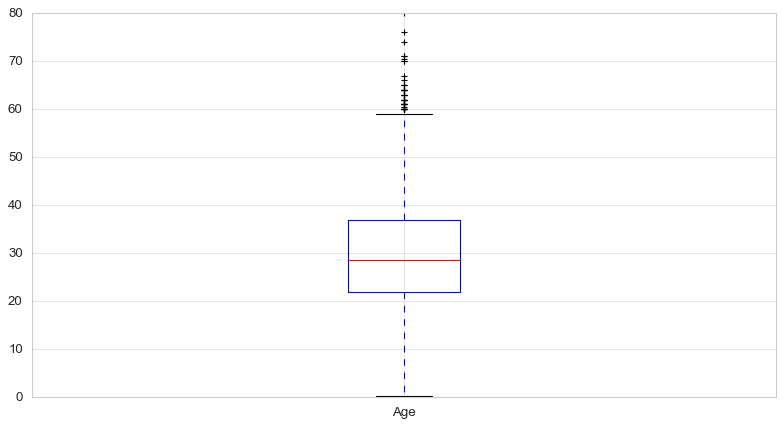

In [56]:
# your code here
titanic.boxplot(column='Age');

#### What does the previous plot tell you about the feature `Age`? Comment.

In [57]:
# your comment here
# The mean age of Titanic people was around 28 years old, the 1st quartile = 22 and the 3rd quartile = 37, there is 
# a group of outliers of advanced ages

#### Now in addition to the summary statistics, we also want to visualize the distribution of `Age`. Choose the appropriate plot to sow below.

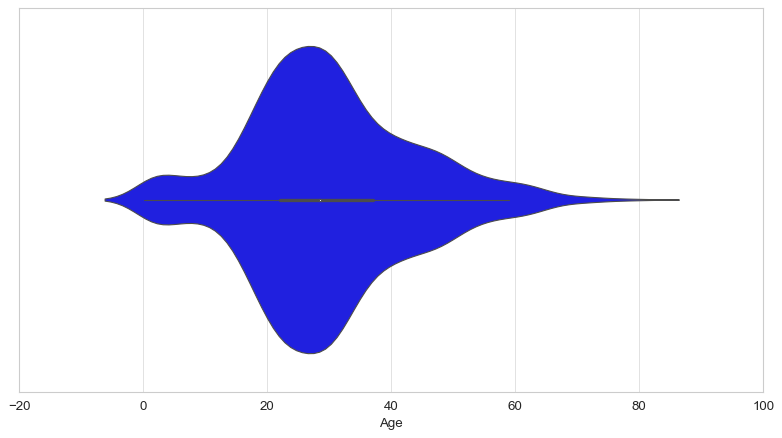

In [58]:
#your code here
sns.violinplot("Age", data=titanic)

#### What additional information in the previous plot provide you about the feature `Age`? Comment.

In [ ]:
#your comment here
# Most of the information provided is the same, however we can see more density on the 2nd and 3rd quartile, and notice that
# there were more kids than earlderly people on the ship

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the appropriate plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.

*Hint: One of the ways involves using Seaborn*

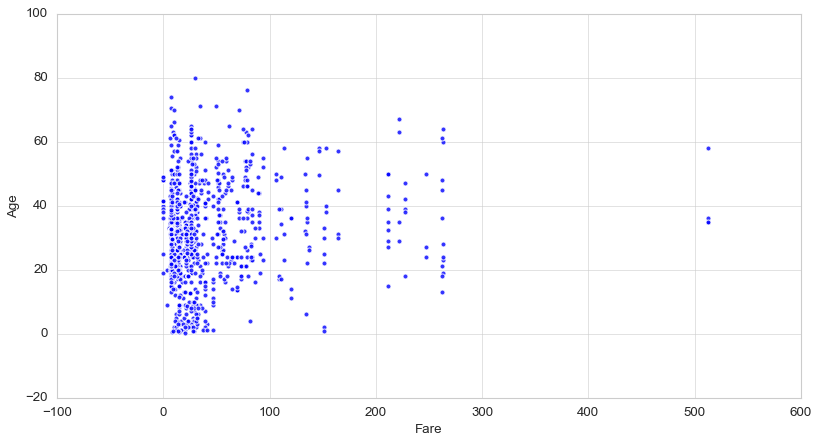

In [63]:
#your code-1st way
plt.scatter(titanic['Fare'],titanic['Age'], alpha = 0.8)
plt.xlabel('Fare')
plt.ylabel('Age');

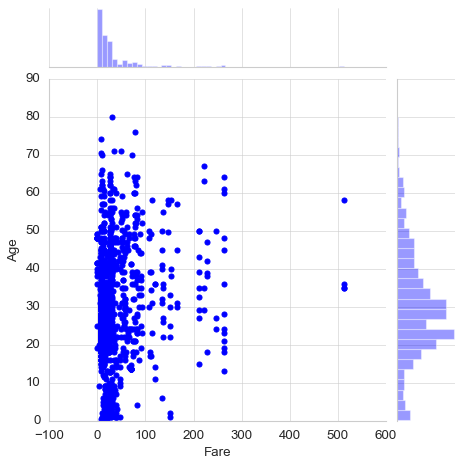

In [64]:
# your code-2nd way
sns.jointplot(x='Fare',y='Age',data=titanic);

#### Using Seaborn plot the correlation matrix of various features.

*Hint: search how to use `heatmap`*

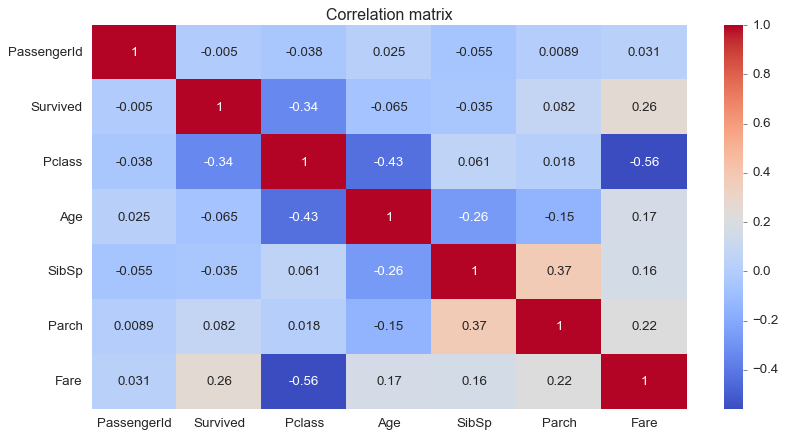

In [72]:
#your code here
sns.heatmap(titanic.corr(),cmap='coolwarm',annot=True)
plt.title('Correlation matrix');

#### According to the previous plot, what are the most correlated feature? Comment.

In [ ]:
#your comment here
# The most correlated are Pclass and Fare with a negative correlation, as the Class is lower in numer the fare increasses
# Also there is a strong negative correlation between the class and age, showing that as older the people gets, on a better Class
# will travel. There is a third strong correlation between Parch and SibSp. Finally Pclass and the people that survived has a 
# strong correlation, meaning that most of the people with a better class survived

#### Use the appropriate plot to display the summary statistics of the `Age` in function of the `Pclass`.

*Hint: use boxplot to display summary statistics of `Age` in relation to each of the discrete values of `Pclass`*

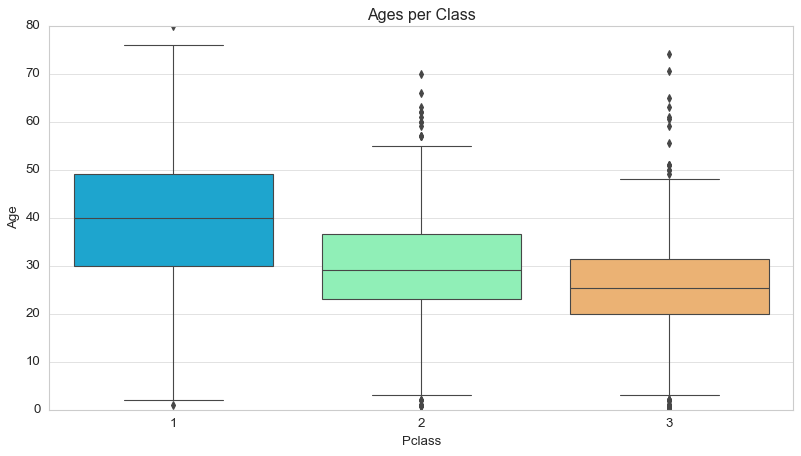

In [75]:
#your code here
sns.boxplot(x='Pclass',y='Age',data=titanic,palette='rainbow')
plt.title('Ages per Class');

#### Use the appropriate plot to display the distributions of  `Age` in relation to  `Gender`.

*Hint: use Facetgrid to display the distribution of `Age` for each categorical value of `Gender`*

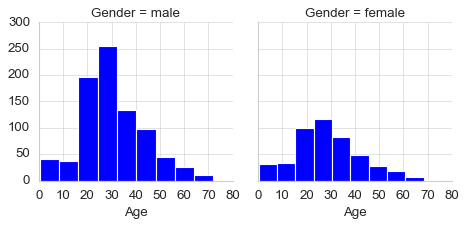

In [78]:
#your code here
g = sns.FacetGrid(data=titanic,col='Gender')
g.map(plt.hist,'Age');

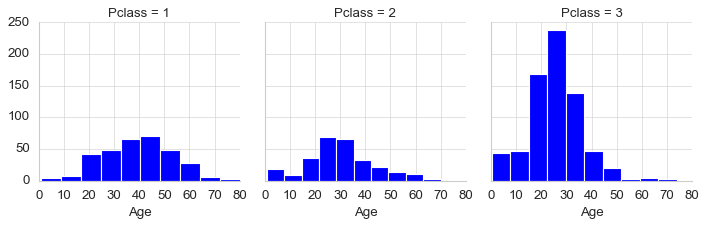

In [81]:
g = sns.FacetGrid(data=titanic,col='Pclass')
g.map(plt.hist,'Age');

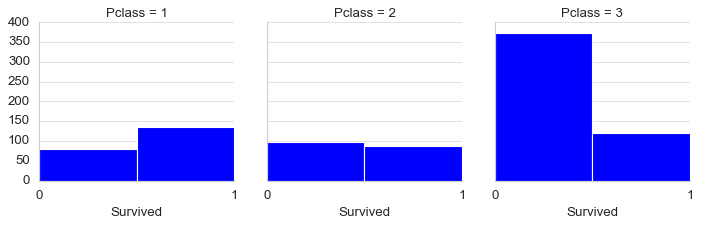

In [120]:
g = sns.FacetGrid(data=titanic,col='Pclass')
g.map(plt.hist,'Survived',bins=2)
plt.xticks(list(range(2)),['0','1']);


In [226]:
tot_pass = titanic['PassengerId'].count()
titanic[titanic['Survived']==1].groupby('Pclass').sum()
# titanic.groupby('Pclass').sum()
titanic['Survived'] = titanic['Survived'].fillna(0)
people_class = titanic.groupby('Pclass').aggregate({'Pclass':[np.count_nonzero]})
people_survived = titanic.groupby('Pclass').aggregate({'Survived':[np.count_nonzero]})


In [227]:
survived = people_class.join(people_survived)
survived['Deaths'] = survived['Pclass'] -survived['Survived'] 
survived['SurvivedRatio'] = survived['Survived']/survived['Pclass']
survived['DeathRatio'] = 1- (survived['Survived']/survived['Pclass'])

In [228]:
print('Almost half of the Rich people survived with a Survived ratio of 42%, while poor people had a death ratio of  83%')
survived


Almost half of the Rich people survived with a Survived ratio of 42%, while poor people had a death ratio of  83%


,Pclass,Survived,Deaths,SurvivedRatio,DeathRatio
,count_nonzero,count_nonzero,,,
Pclass,,,,,
1,323,136.0,187.0,0.421053,0.578947
2,277,87.0,190.0,0.314079,0.685921
3,709,119.0,590.0,0.167842,0.832158
